In [1]:
import pandas as pd 
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
import string
%matplotlib inline
sns.set()

In [47]:
train = pd.read_csv('google-quest-challenge/train.csv')
test = pd.read_csv('google-quest-challenge/test.csv')

In [3]:
train.shape, test.shape

((6079, 41), (476, 11))

In [3]:
train.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6079 entries, 0 to 6078
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   qa_id                                  6079 non-null   int64  
 1   question_title                         6079 non-null   object 
 2   question_body                          6079 non-null   object 
 3   question_user_name                     6079 non-null   object 
 4   question_user_page                     6079 non-null   object 
 5   answer                                 6079 non-null   object 
 6   answer_user_name                       6079 non-null   object 
 7   answer_user_page                       6079 non-null   object 
 8   url                                    6079 non-null   object 
 9   category                               6079 non-null   object 
 10  host                                   6079 non-null   object 
 11  ques

In [12]:
title =train['question_title'].values
body = train['question_body'].values

In [40]:
title[1]

'What is the distinction between a city and a sprawl/metroplex... between downtown and a commercial district?'

In [41]:
body[1]

'I am trying to understand what kinds of places the spam values on p 231 refer to in the 5th Edition main book for Shadowrun.\n\nPer p 15, a sprawl is a plex, a plex is a "metropolitan complex, short for metroplex". Per Google a metroplex is " a very large metropolitan area, especially one that is an aggregation of two or more cities".  A city downtown and sprawl downtown would tend to have similar densities, but for some reason the sprawl (which includes suburbs?) has a higher spam zone noise rating (p 231).  Similarly, I\'d think of a downtown as being more dense and noisy (e.g. Office buildings and street vendors) than a commercial district, e.g. an outdoor mall.  The noise ratings make me think that I am thinking about this incorrectly. What is a better way of thinking of them?\n'

In [137]:
train.answer_user_name.nunique(), train.question_user_name.nunique()

(4114, 3215)

In [138]:
train.answer_user_page.nunique(), train.question_user_name.nunique()

(4430, 3215)

In [140]:
train.url.nunique(), train.host.nunique(), train.category.nunique()

(3583, 63, 5)

In [143]:
train.host.value_counts(normalize=True)

stackoverflow.com                      0.206119
english.stackexchange.com              0.037671
superuser.com                          0.037342
electronics.stackexchange.com          0.036355
serverfault.com                        0.035039
                                         ...   
meta.christianity.stackexchange.com    0.000658
robotics.stackexchange.com             0.000329
meta.askubuntu.com                     0.000329
meta.math.stackexchange.com            0.000329
meta.codereview.stackexchange.com      0.000329
Name: host, Length: 63, dtype: float64

In [146]:
train.category.value_counts(normalize=True)

TECHNOLOGY       0.401546
STACKOVERFLOW    0.206119
CULTURE          0.158414
SCIENCE          0.117289
LIFE_ARTS        0.116631
Name: category, dtype: float64

In [33]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

In [34]:
def normalizeLine(line):
    tokens = tokenizer.tokenize(line)
    line = " ".join([ token for token in tokens])

    line = re.sub('[\s]+', ' ', line)
    line = re.sub('[\n]+', ' ', line)
    line = line.replace("cannot ", "can not ").replace("n't ", " n't ").replace("n 't ", " n't ").replace("ca n't", "can't").replace("ai n't", "ain't")
    line = line.replace("'m ", " 'm ").replace("'re ", " 're ").replace("'s ", " 's ").replace("'ll ", " 'll ").replace("'d ", " 'd ").replace("'ve ", " 've ")
    line = line.replace(" p . m .", "  p.m.") .replace(" p . m ", " p.m ").replace(" a . m .", " a.m.").replace(" a . m ", " a.m ")
    
    return " ".join(line.split())

In [150]:
train.groupby('category')['answer_type_reason_explanation'].mean()

category
CULTURE          0.613534
LIFE_ARTS        0.620592
SCIENCE          0.678354
STACKOVERFLOW    0.350359
TECHNOLOGY       0.451045
Name: answer_type_reason_explanation, dtype: float64

#### Data Visualization

In [112]:
# calculate the sentence length

sent_len = train['question_body'].apply(lambda x : len(x.split()))

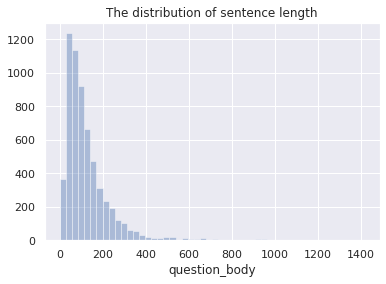

In [117]:
# The visualization of sentence length

sns.distplot(sent_len,kde=False,hist=True,color="b")

plt.title('The distribution of sentence length')
plt.show()

In [118]:
# calculate the sentence length

sent_len = train['answer'].apply(lambda x : len(x.split()))

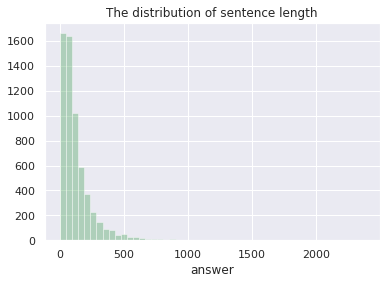

In [119]:
# The visualization of sentence length

sns.distplot(sent_len,kde=False,hist=True,color="g")

plt.title('The distribution of sentence length')
plt.show()

In [25]:
scores = train.loc[:,train.dtypes==np.float64].columns

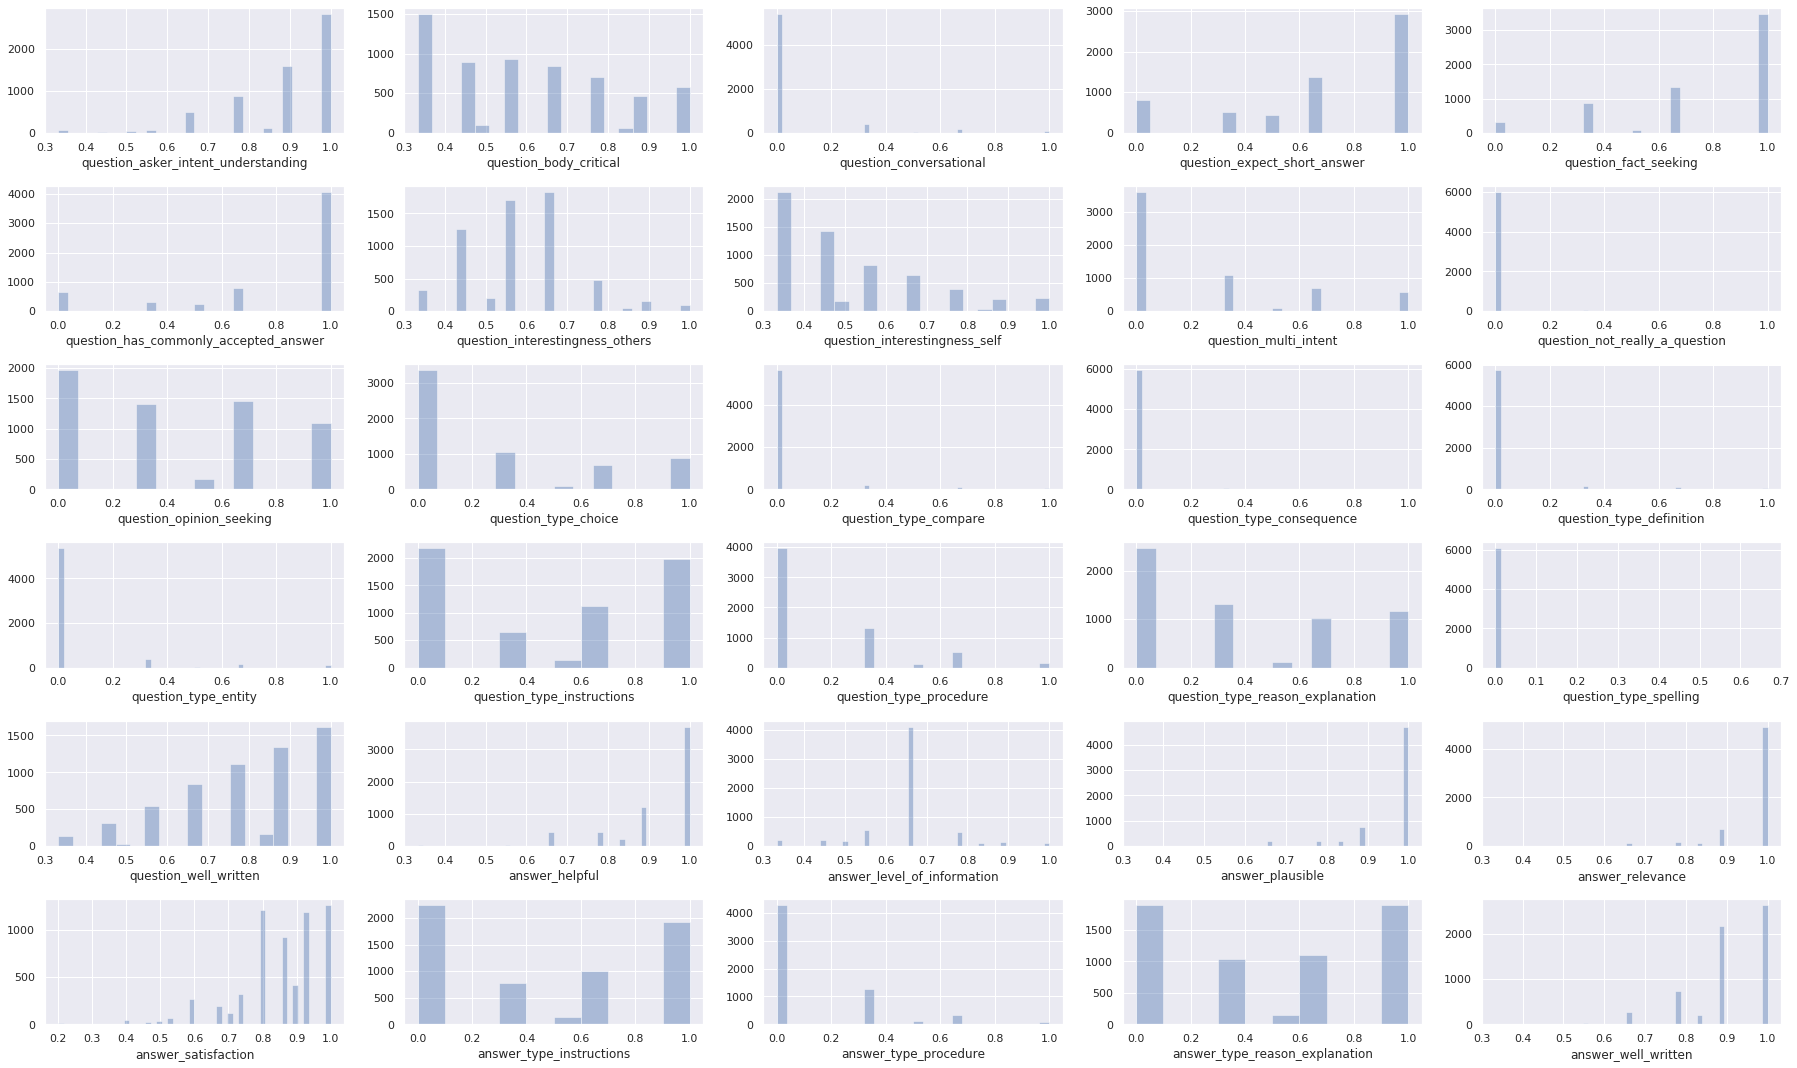

In [133]:
nrows=6
ncols=5

fig, axs = plt.subplots(nrows,ncols,figsize=(ncols*5,nrows*2.5))
fig.subplots_adjust(hspace=0.2,wspace=0.2)

for r in range(nrows):
    for c in range(ncols):
        i=r*ncols+c
        sns.distplot(train.loc[:,scores[i]],kde=False,hist=True,ax=axs[r][c])
        
plt.tight_layout()
plt.show()

In [6]:
train['question_type_definition'].value_counts()

0.000000    5735
0.333333     173
0.666667     110
1.000000      51
0.500000      10
Name: question_type_definition, dtype: int64

In [7]:
train['question_type_spelling'].value_counts()

0.000000    6068
0.333333       7
0.666667       4
Name: question_type_spelling, dtype: int64

In [8]:
train['question_type_compare'].value_counts()

0.000000    5652
0.333333     222
0.666667     119
1.000000      71
0.500000      15
Name: question_type_compare, dtype: int64

In [9]:
train['question_not_really_a_question'].value_counts()

0.000000    6013
0.333333      48
0.500000      11
0.666667       4
1.000000       3
Name: question_not_really_a_question, dtype: int64

In [10]:
train['question_type_consequence'].value_counts()

0.000000    5948
0.333333      86
0.666667      26
1.000000      11
0.500000       8
Name: question_type_consequence, dtype: int64

In [21]:
cor_target = train.loc[:,train.dtypes == np.float].corr()

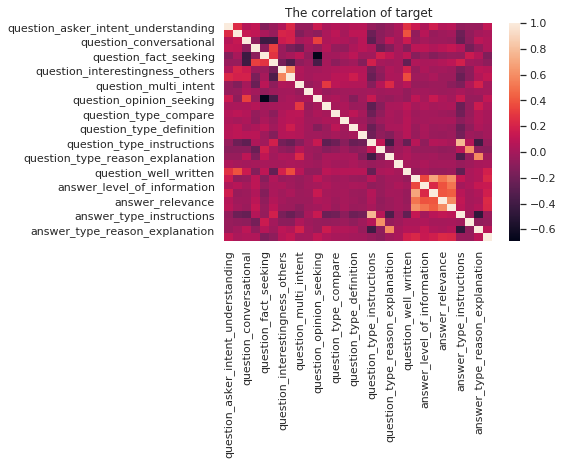

In [23]:
sns.heatmap(cor_target)

plt.title('The correlation of target')
plt.show()

In [13]:
x = train['question_body'].values.tolist()

In [48]:
x = train['question_body'][12]

In [114]:
x = x.split('\n')

In [38]:
pattern = re.compile(r'[^A-za-z\d\s]+')   
result = pattern.findall(' '.join(x))

In [14]:
def extract_punct(x):
    x = x.split('\n')
    pattern = re.compile(r'[^A-za-z\d\s]+')   
    result = pattern.findall(' '.join(x))
    result = set(result)
    return result

In [15]:
result = list(map(extract_punct, x))

In [16]:
from functools import reduce

In [17]:
result = reduce(lambda x, y: x.union(y), result)

In [18]:
common_punct = [",",".","!",":","?","'",";","/",'"']
for punct in common_punct:
    result.remove(punct)

In [19]:
result = list(result)

In [51]:
def clean_data(x):
    x = x.split('\n')
    for i in range(1,len(x)-1):
        x[i] = x[i].strip()
        for punct in result:
            if punct in x[i]:
                x[i] = ''
                break
    return ' '.join([item.strip() for item in x if item != ''])

In [52]:
clean_data(x)

"can someone read through this script really quick and verify that I didn't miss anything... I'm not getting any errors in my IDE so just have to make sure the structure is correct exit; exit; else: endif;"

In [53]:
train['question_body'] = train['question_body'].apply(clean_data)

In [54]:
train['answer'] = train['answer'].apply(clean_data)

In [246]:
x = x.split('\n')

In [61]:
from transformers import AlbertTokenizer

tokenizer = AlbertTokenizer.from_pretrained('models')

In [48]:
inputs = tokenizer()

In [55]:
train['question'] = train['question_body'] + " " + train['question_title']

In [59]:
qu = train['question'].values.tolist()
an = train['answer'].values.tolist()

In [70]:
max_len = 0

# For every sentence...
for i in range(len(qu)):

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer(qu[i],an[i],padding='max_length', truncation=True, max_length=512)['input_ids']
    if 0 not in input_ids:
        print(input_ids)
        break
    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)


[2, 31, 57, 21, 3033, 11400, 20, 3528, 969, 172, 9, 264, 22, 8590, 15, 56, 31, 2595, 69, 568, 121, 10035, 13, 24588, 3327, 4384, 3326, 9, 31, 679, 172, 10711, 18, 13, 5, 8888, 11400, 17, 13, 12402, 11400, 6, 9, 761, 2159, 83, 104, 5844, 14, 64, 10711, 9, 86, 15, 31, 794, 2936, 14, 10711, 18, 568, 14, 29476, 2159, 9, 235, 50, 51, 12891, 10172, 45, 8582, 13, 118, 14438, 118, 3363, 11849, 9093, 387, 45, 1417, 1811, 14023, 15, 1417, 21435, 4736, 20470, 34, 3231, 268, 4153, 15, 347, 12653, 118, 4792, 15, 390, 2714, 3216, 9357, 18, 15, 600, 8372, 3698, 23381, 12653, 8582, 25570, 45, 713, 396, 3993, 9007, 7061, 379, 3646, 6801, 799, 241, 5198, 4924, 329, 13, 118, 14438, 118, 3363, 11849, 9093, 387, 306, 135, 390, 2714, 2887, 8372, 3698, 24363, 13, 24696, 4060, 4060, 10270, 13024, 8582, 13, 118, 14438, 118, 18, 593, 45, 13, 12402, 9, 165, 14857, 15, 203, 2727, 2738, 20165, 4436, 34, 3231, 13, 20038, 4153, 15, 5927, 12653, 118, 4792, 15, 203, 3877, 1543, 9357, 18, 15, 600, 13, 21735, 1419, 1996

In [85]:
import gc
gc.collect()

20